<a href="https://colab.research.google.com/github/bwdshufe/fukuilab_facial_recognition/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 完整的Colab代码
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

!pip install torch torchvision ninja imageio imageio-ffmpeg

Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111 (from 1)
Receiving objects: 100% (111/111), 1.55 MiB | 33.10 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2encoder
--2025-10-08 09:21:23--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-08 09:21:24--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================

Saving face.jpg to face.jpg
已移动: face.jpg
2025-10-08 09:21:56.782261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759915316.802186   18372 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759915316.808370   18372 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759915316.825404   18372 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759915316.825432   18372 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759915316.825437   18372 computa

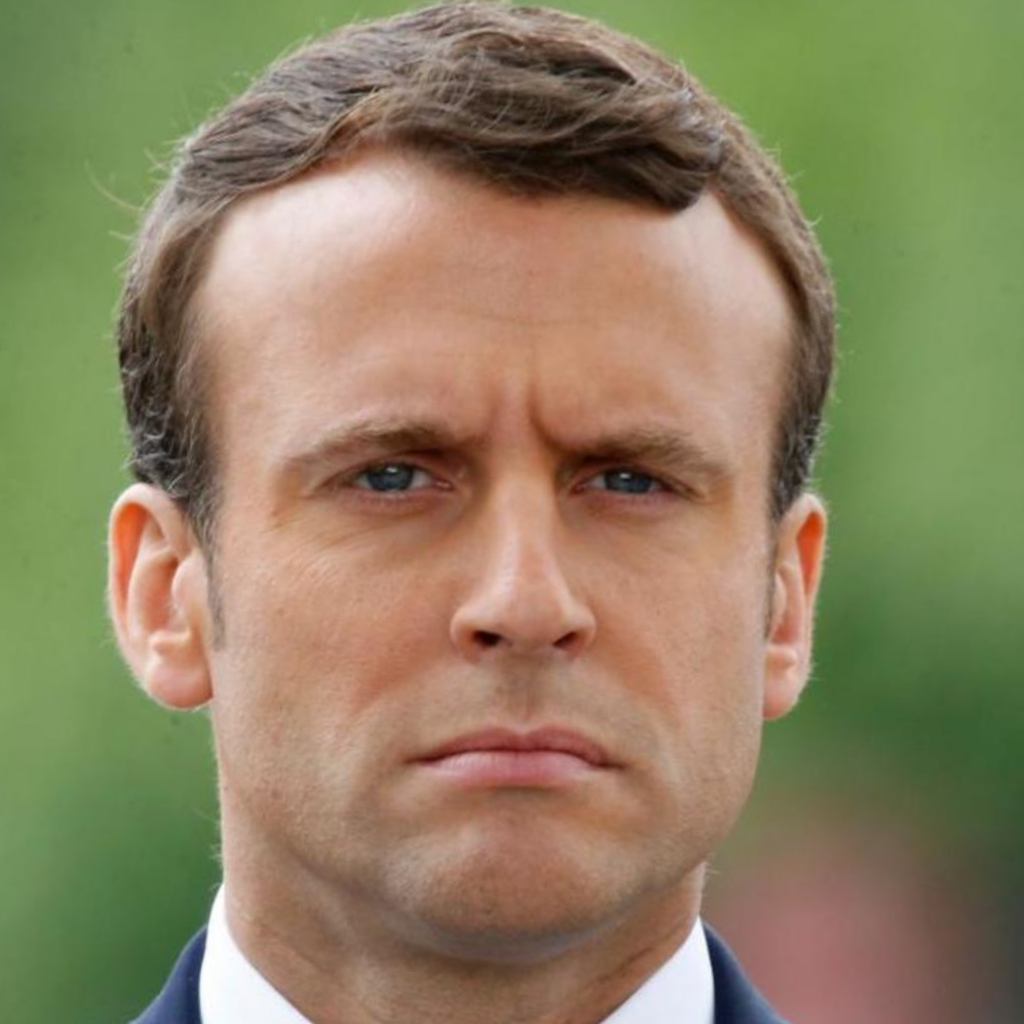

/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 38.59 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch

将投影图像: ../stylegan2encoder/aligned_images/face_01.png
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... W1008 09:22:20.556000 18484 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1008 09:22:20.556000 18484 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['

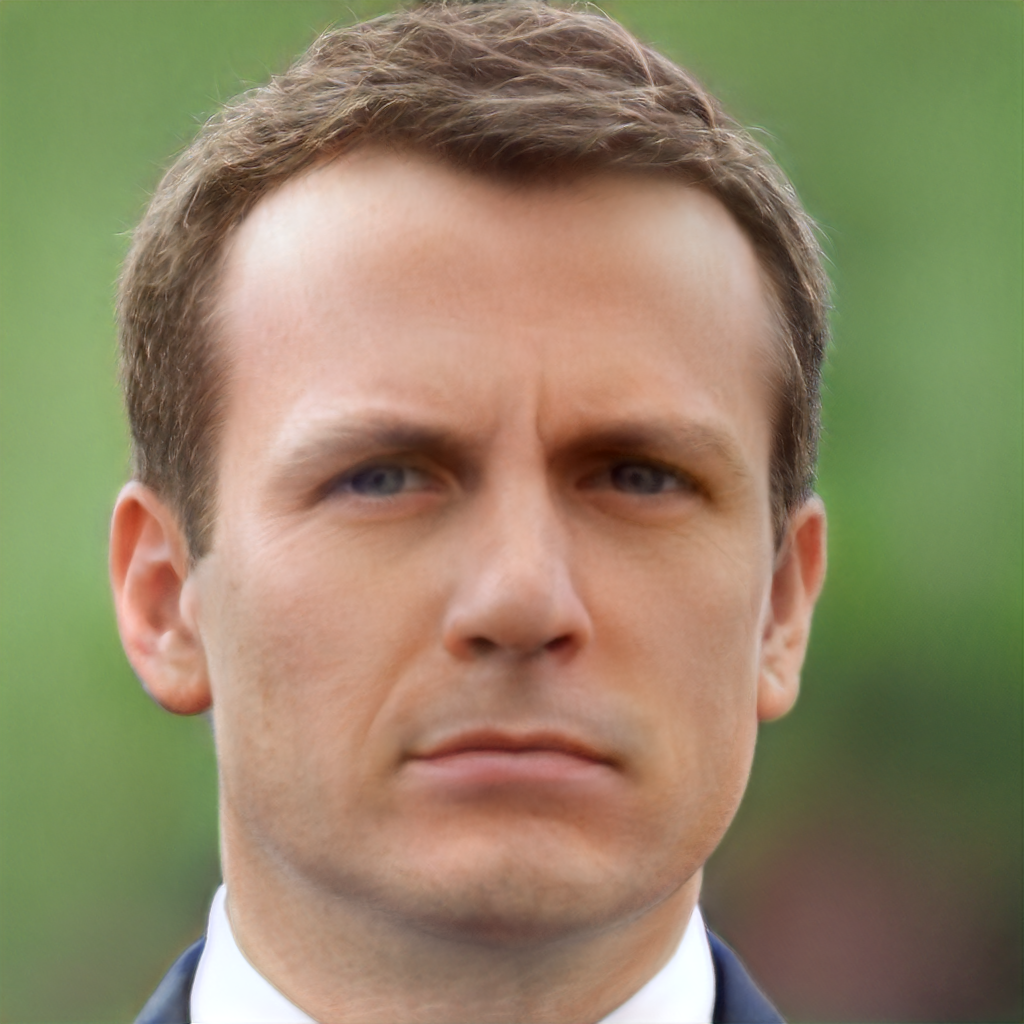

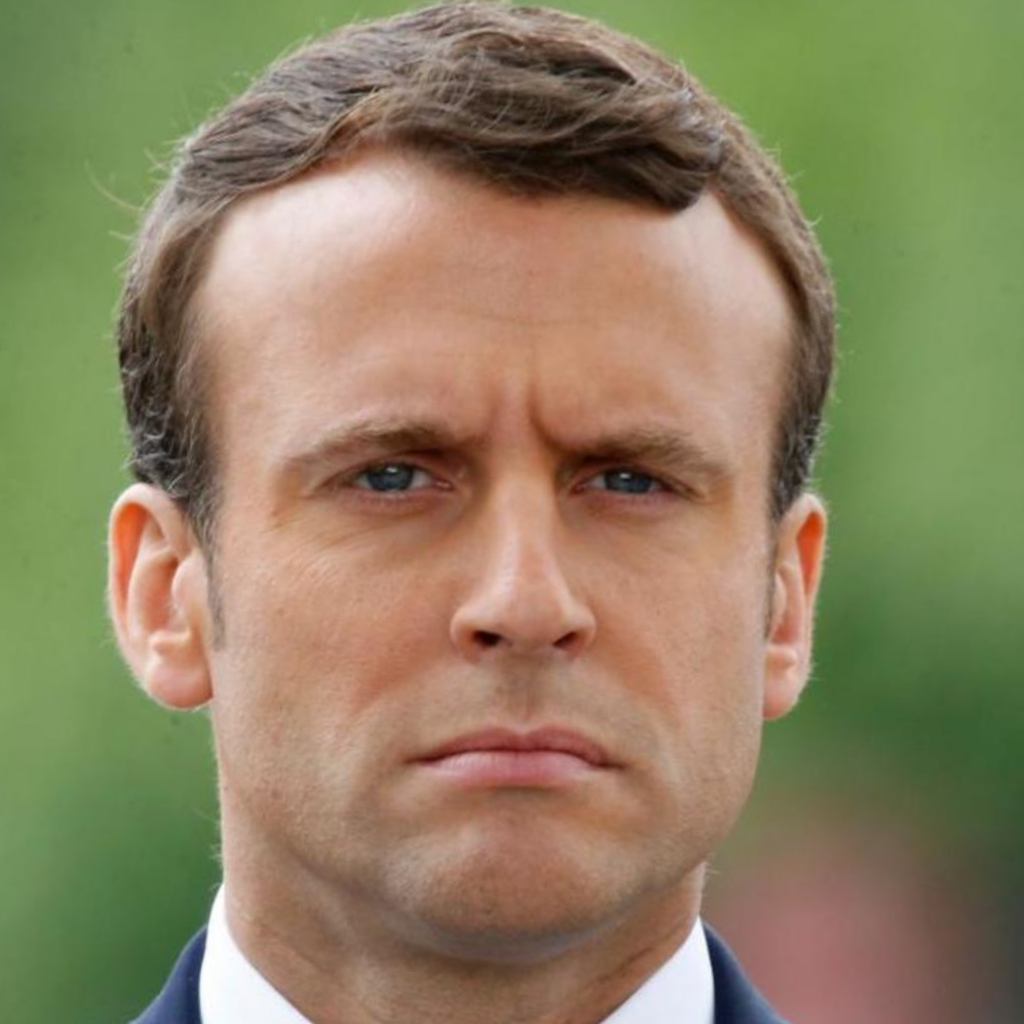

In [ ]:
# 1. 克隆项目
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

# 2. 安装依赖
!pip install -q scipy dlib

# 3. 下载人脸关键点模型
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 4. 修复PIL兼容性问题
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

# 5. 创建文件夹
!mkdir -p raw_images aligned_images

# 6. 上传图像
from google.colab import files
print("请上传你的原始人脸图像:")
uploaded = files.upload()

# 7. 移动上传的文件到 raw_images 文件夹
import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'raw_images/{filename}')
    print(f"已移动: {filename}")

# 8. 对齐图像
!python align_images.py raw_images/ aligned_images/

# 9. 查看对齐结果
!ls -lh aligned_images/

# 10. 显示对齐后的图像
from IPython.display import Image, display
import glob
for img in glob.glob('aligned_images/*.png'):
    print(f"\n对齐后: {img}")
    display(Image(img))

# 11. 克隆StyleGAN2-ADA-PyTorch进行投影
%cd ..
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch
!pip install -q ninja

# 12. 获取对齐后的图像文件名
aligned_images = glob.glob('../stylegan2encoder/aligned_images/*.png')
if aligned_images:
    target_image = aligned_images[0]
    print(f"\n将投影图像: {target_image}")

    # 13. 执行投影
    !python projector.py \
      --outdir=out \
      --target={target_image} \
      --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl \
      --num-steps=1000

    # 14. 显示投影结果
    print("\n投影完成！结果:")
    for result in sorted(glob.glob('out/*.png')):
        display(Image(result))
else:
    print("未找到对齐后的图像，检查对齐过程是否有错误")

In [ ]:
!ls -lh out/

In [ ]:
from google.colab import files
files.download('out/proj.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>